# Differentialgleichungen basics 

bei einer Differentialgleichung kennt man aufrgund von Rahmenbedingungen die **Ableitung einer Kurve** jedoch kennt man nicht die Kurve selbst

Am beispiel einer chemischen Reaktion **1. Ordnung**

$A' = k*A$

- Das bedeuted, um den eigentlichen Konzentrationsverlauf und nicht nur den Ableitung davon zu erhalten muss man diese integrieren

mit kleinen differentialgleichungen wie $A' = k*A$ geht das noch einfach, allerdings wird es bei bei größeren gleichungen fast unmöglich die Stannfunktion zu finden



# Differentialgleichungen mit scipy lösen <a class="anchor" id="chapter1"></a>

## Anforderungen an Scipy odeint

1. Das Modell wird definiert als Funktion

``` 
def func(y, t):
    k =0.3
    dydt = -k*y
    return dydt
```

**Dabei muss folgendes erfüllt sein:**
- Konstanten müssen definiert oder instanziiert sein
- y ist ein Wert und stellt die Anfangsbedingung dar
- x ist ein Array, welcher die x werte abbildet über welche integriert werden soll

2. odeint initialisieren

Hat man die Differentialgleichung definiert, muss diese nur noch von odeint integriert werden:

```
sol = odeint(func,y0, time)

```

- **func**: Ist die Differentialgleichung welche zuvor definiert wurde
- **y0**: ist die Anfangsbedingung welche erfüllt sein muss (Ist eine voraussetzung, denn odeint braucht einen Startpunkt)
- **time**: Ist die unabhängige Variable, die Odeint vorgibt wo und über Welchen bereich integriert werden muss

3. Das Ergebnis

Sobald die Differentialgleichung integiert wurde, erhält man einen **array** in welchem sich die integrierten Werte befinden



<a id="dgl-scipy"> </a>

# DGL mit Python scipy lösen

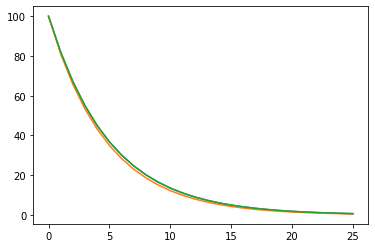

In [4]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importieren eines Datensatzes, welcher von der Differentialgleichung beschrieben werden soll
df = pd.read_excel(r"reaktionen 1 2 ordnung.xlsx")
time = df["Zeit"]
y0 = 100
conc = df["Substratkonzentration k1"]

k = 0.21

# Definieren der Differentialgleichung, in diesem Fall ist es eine Reaktionskinetik 1. Ordnung dA/dt = -k*A !!! Achtung diese Funktion ist die Ableitung der eigentlich Gesuchten Funktion
def func(A, t, k):
    dydt = -k*A
    return dydt

sol = odeint(func,y0, time, args=(k,))
sol2 = odeint(func,y0, time, args=(0.2,))

fig,ax = plt.subplots()
ax.plot(time,conc)
ax.plot(time, sol)
ax.plot(time, sol2)
plt.show()

# Fitting the Model Using Lmfit

Now that we have defined the function, we know which model describes our data, but the curves are still not fitting to one another, so we need to perform a curve fit, to adapt the constants in a way, that the model fits the measured data


model data [[100.        ]
 [ 81.05842509]
 [ 65.70468337]
 [ 53.25918171]
 [ 43.1710533 ]
 [ 34.99377583]
 [ 28.36540338]
 [ 22.99254907]
 [ 18.63739785]
 [ 15.10718093]]
real data 0    100.000000
1     81.873075
2     67.032005
3     54.881164
4     44.932896
5     36.787944
6     30.119421
7     24.659696
8     20.189652
9     16.529889
Name: Substratkonzentration k1, dtype: float64
shape model (26, 1)
shape data (26,)
residualk [  0.         -18.12692469 -32.9679954  -45.11883639 -55.06710359
 -63.21205588 -69.88057881 -75.34030361 -79.8103482  -83.47011118]
model data [[100.        ]
 [ 81.05842509]
 [ 65.70468337]
 [ 53.25918171]
 [ 43.1710533 ]
 [ 34.99377583]
 [ 28.36540338]
 [ 22.99254907]
 [ 18.63739785]
 [ 15.10718093]]
real data [100.          81.87307531  67.0320046   54.88116361  44.93289641
  36.78794412  30.11942119  24.65969639  20.1896518   16.52988882]
shape model (26, 1)
shape data (26,)
residualk [  0.         -18.12692469 -32.9679954  -45.11883639 -55.06710359
 -6

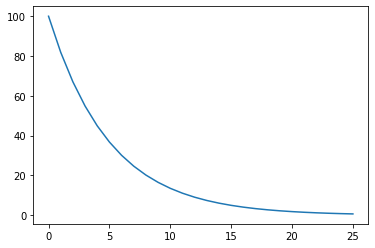

In [2]:
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lmfit



df_lmfit = pd.read_excel(r"reaktionen 1 2 ordnung.xlsx")
ts = np.array(df_lmfit["Zeit"])
y0 = 100
c = np.array(df_lmfit["Substratkonzentration k1"])

params = lmfit.Parameters()
params.add('k', 0.21 ,min=0.00000001, max=0.5)

def resid(params, x, ydata):
    k = params['k'].value
    x0 = 100

    ymodel = odeint(func, x0, x, args=(k,))
    print("model data",ymodel[:10])
    res = np.array(ydata)-ymodel[0]
    print("real data", ydata[:10])
    print("shape model",ymodel.shape)
    print("shape data",np.array(ydata).shape )
    print("residualk",res[:10])
    return res.flatten()

checklist = resid(params, time, conc)

fig,ax = plt.subplots()
ax.plot(time, conc)
#ax.plot(time, resid)

o1 = lmfit.minimize(resid, params, args = (ts, c), method='least_squares')
lmfit.report_fit(o1)

print(o1.ndata)

#print(np.array(conc))

